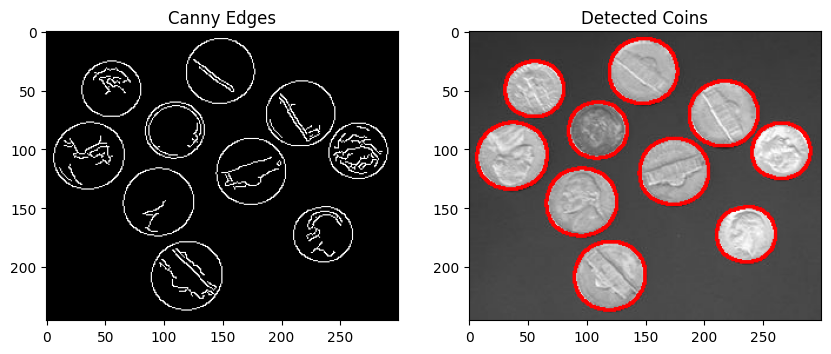

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()
cv2.drawContours(output, contours, -1, (0, 0, 255), 2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Canny Edges")
plt.imshow(edges, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Detected Coins")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()